In [2]:
# here building a basic chatbot which stores entire conversation  history in RAM

In [3]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict,Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver


/Users/priya/LangChain/langchainvenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [4]:
from langgraph.graph import add_messages
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [5]:
llm=ChatOpenAI()

In [6]:
def ChatNode(state:ChatState):
    #extract user query from state
    messages=state['messages']

    # send to llm
    response=llm.invoke(messages)

    # store the response back in state
    return {'messages': [response]}

In [7]:
checkpoint=MemorySaver()
graph=StateGraph(ChatState)

# add nodes
graph.add_node('Chat_Node', ChatNode)

# add edges
graph.add_edge(START,'Chat_Node')
graph.add_edge('Chat_Node',END)

# run the graph 
chat_bot=graph.compile(checkpointer=checkpoint)

# run the graph


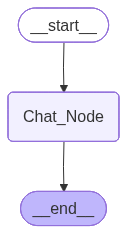

In [8]:
chat_bot

In [10]:
# let's insert RAM into this chatbot
thread_id='1'
while True:
    user_input=input('type here: ')
    print('User: ',user_input)

    if user_input.strip().lower() in['exit','quit','bye']:
        break
    config={'configurable': {'thread_id':thread_id}}
    response=chat_bot.invoke({'messages':[HumanMessage(content=user_input)]},config=config)
    print("AI: ",response['messages'][-1].content)

User:  hey
AI:  Hello! How can I assist you today?
User:  if x=10 and i want to add 2 to it whta is the answer
AI:  If x = 10 and you want to add 2 to it, the answer would be 12.
User:  now add 12 to it
AI:  If you add 12 to the previous result of 12, the new result would be 24.
User:  quit


In [13]:
chat_bot.get_state(config)

StateSnapshot(values={'messages': [HumanMessage(content='hey', additional_kwargs={}, response_metadata={}, id='60b46d42-790f-42e2-b196-afbbb4aaedd3'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019ba913-b493-71f3-a424-ee9072024fe1-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='if x=10 and i want to add 2 to it whta is the answer', additional_kwargs={}, respon

In [14]:
list(chat_bot.get_state_history(config))

[StateSnapshot(values={'messages': [HumanMessage(content='hey', additional_kwargs={}, response_metadata={}, id='60b46d42-790f-42e2-b196-afbbb4aaedd3'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019ba913-b493-71f3-a424-ee9072024fe1-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='if x=10 and i want to add 2 to it whta is the answer', additional_kwargs={}, respo